In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv")
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


Types of analysis

Univariate Analysis
Univariate analysis focuses on a single variable. Graphs for univariate analysis typically summarize and provide insights into the distribution, central tendency, and variability of the data.
-Histogram: Shows the distribution of a numerical variable.
-Bar Chart: Displays frequency or count of categories for a categorical variable.
-Box Plot: Represents the distribution of a numerical variable, highlighting the median, quartiles, and outliers.
-Pie Chart: Illustrates the relative proportions of categories within a categorical variable.
-Density Plot: Visualizes the distribution of a continuous numerical variable.

Bivariate Analysis
Bivariate analysis explores the relationship between two variables. These graphs are used to understand correlations, trends, and potential causality.
-Scatter Plot: Shows the relationship between two continuous variables.
-Line Graph: Useful for displaying trends over time between two variables.
-Bar Chart: Compares two categorical variables or a categorical and a numerical variable.
-Stacked Bar Chart: Visualizes the relationship between a categorical and a numerical variable, displaying the total amount and breakdown of categories.
-Heatmap: Represents the relationship between two categorical variables using color coding.
-Violin Plot: A violin plot combines a box plot and a kernel density plot.

Multivariate Analysis
Multivariate analysis involves more than two variables. These graphs are more complex and are used to understand interactions between multiple variables.
-Pair Plot: Displays pairwise relationships in a dataset, useful for quickly scanning many variables.
-3D Scatter Plot: Shows relationships between three numerical variables.
-Bubble Chart: An extension of the scatter plot, where the size of the bubble can represent an additional variable.
-Parallel Coordinates Plot: Displays each feature on a separate column and connects the features of each data point with lines, useful for seeing clusters and patterns across multiple variables.

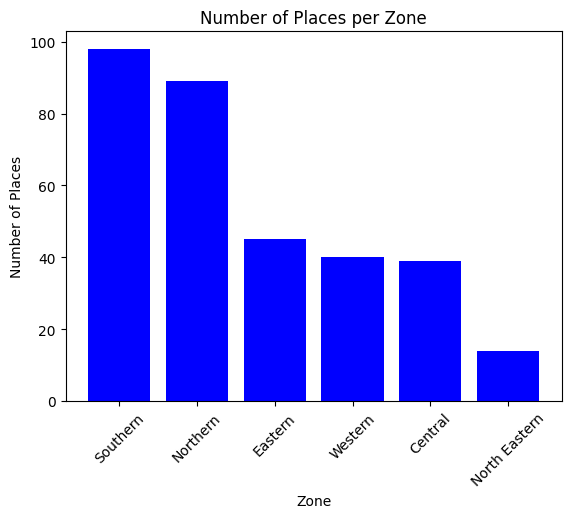

In [4]:
# 1
# Bar Chart: Bar charts are useful for comparing quantities across different categories or groups, 
#            specially when number of categories are more than 5. 

# Count the number of places in each zone
zone_counts = df['Zone'].value_counts()

# Data for plotting
zones = zone_counts.index
counts = zone_counts.values

# Create a bar graph
plt.figure()
plt.bar(zones, counts, color='blue')

# Adding title and labels
plt.title('Number of Places per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Places')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

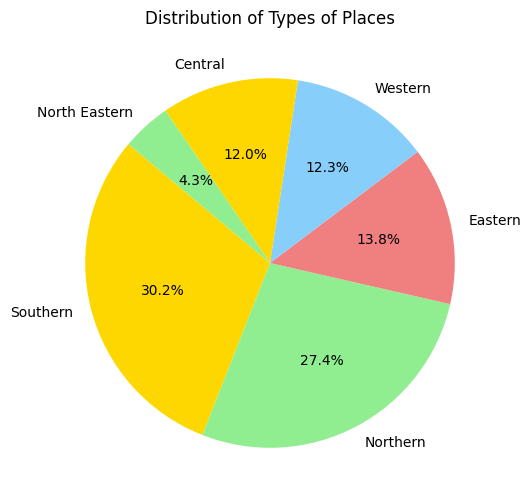

In [5]:
# 2
# Pie Chart: Pie charts are best used for showing the composition of a whole, where you want to illustrate
#            how different parts make up a total, specially when number of categories are less than 5. . 
type_distribution = df['Zone'].value_counts()

plt.figure(figsize=(10, 6))
type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Types of Places')
plt.ylabel('')
plt.show()

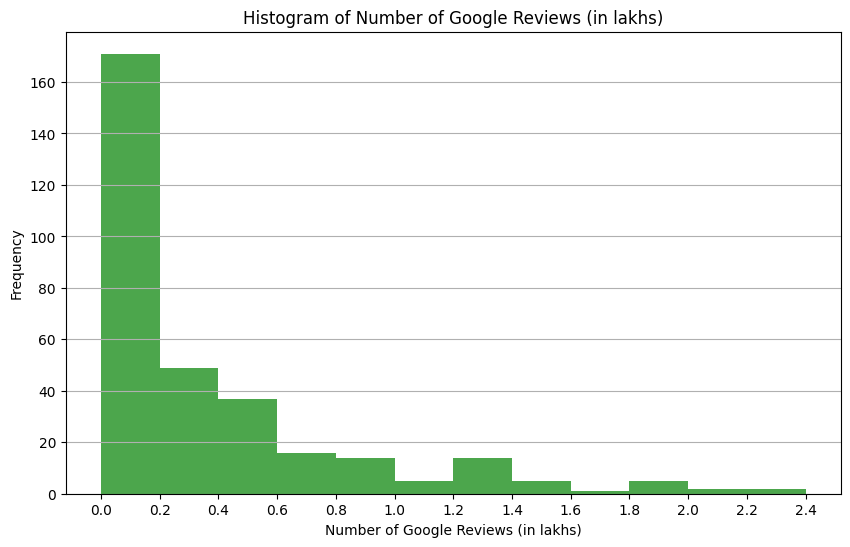

In [6]:
# 3
# Histogram: To show the distribution of a numerical dataset, revealing patterns such as skewness, 
#            bimodality, or central tendency.
# Creating the bins
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Number of google review in lakhs'], bins=bins, color='green', alpha=0.7)
plt.title('Histogram of Number of Google Reviews (in lakhs)')
plt.xlabel('Number of Google Reviews (in lakhs)')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y')
plt.show()

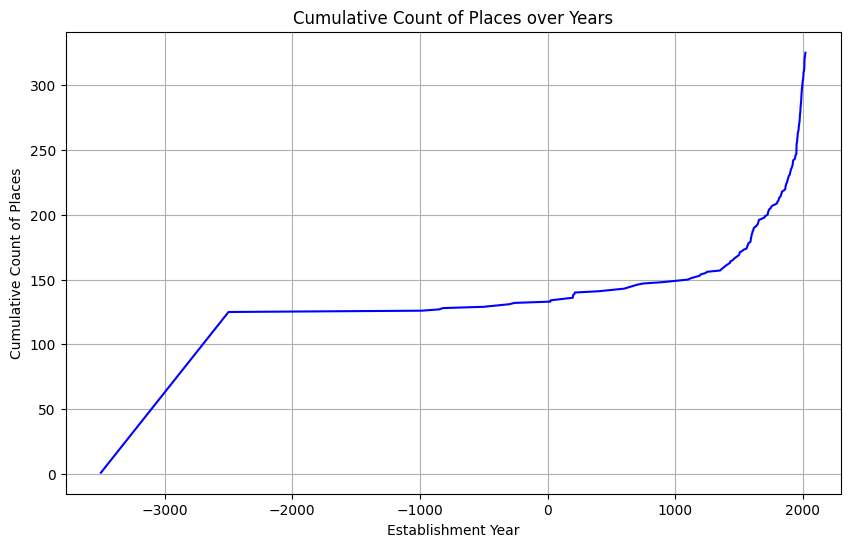

In [7]:
# 4
# Line Plot: Employ a line plot for visualizing trends and changes in data over time or continuous variables.

# Replace 'Unknown' in 'Establishment Year' with -2500
df['Establishment Year'] = df['Establishment Year'].replace('Unknown', -2500)

# Convert 'Establishment Year' to numeric, errors are coerced to NaN and then replaced with -2500
df['Establishment Year Updated'] = pd.to_numeric(df['Establishment Year'], errors='coerce').fillna(-2500).astype(int)

# Calculate the cumulative count of places for each year
yearly_cumulative_count = df.groupby('Establishment Year Updated').size().cumsum()

# Plotting the line chart
plt.figure(figsize=(10, 6))
yearly_cumulative_count.plot(kind='line', color='blue')
plt.title('Cumulative Count of Places over Years')
plt.xlabel('Establishment Year')
plt.ylabel('Cumulative Count of Places')
plt.grid()
plt.show()

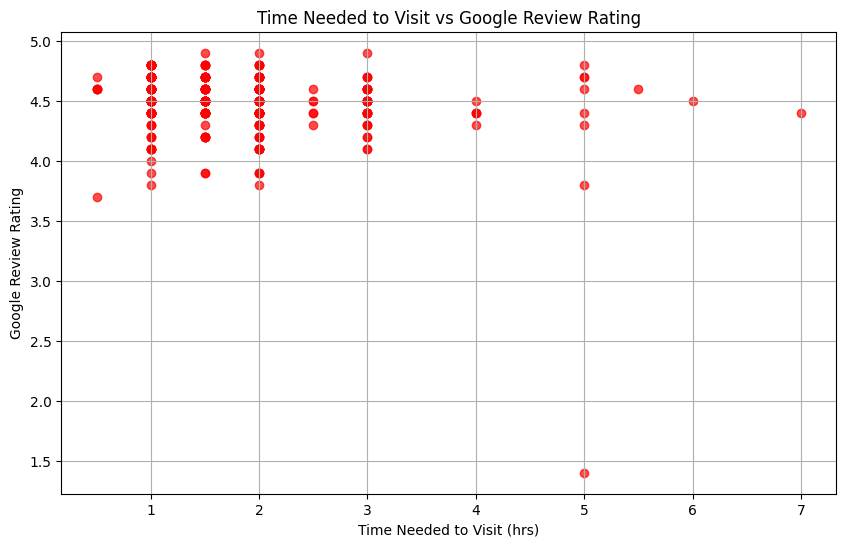

In [8]:
# 5
# Scatter Plot: A scatter plot is ideal for examining the relationship or correlation between two numerical variables.

plt.figure(figsize=(10, 6))
plt.scatter(df['time needed to visit in hrs'], df['Google review rating'], color='red', alpha=0.7)
plt.title('Time Needed to Visit vs Google Review Rating')
plt.xlabel('Time Needed to Visit (hrs)')
plt.ylabel('Google Review Rating')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

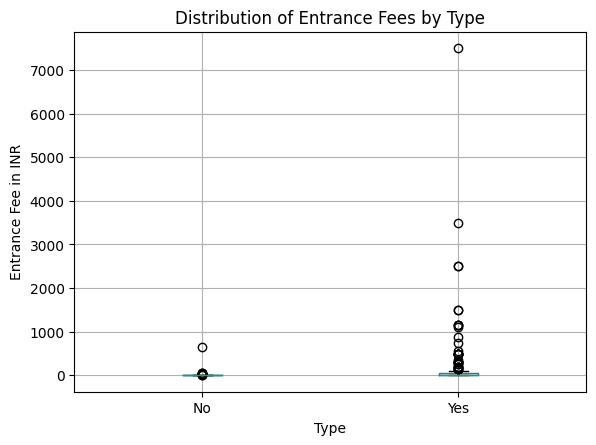

In [9]:
# 6
# Box Plot: Use a box plot to display the distribution of a dataset, 
#           highlighting its median, quartiles, and outliers, which is especially useful for comparing distributions across different categories or groups.

plt.figure(figsize=(10, 6))
df.boxplot(column='Entrance Fee in INR', by='DSLR Allowed')
plt.title('Distribution of Entrance Fees by Type')
plt.suptitle('') # Removes the default title
plt.xlabel('Type')
plt.ylabel('Entrance Fee in INR')
plt.show()

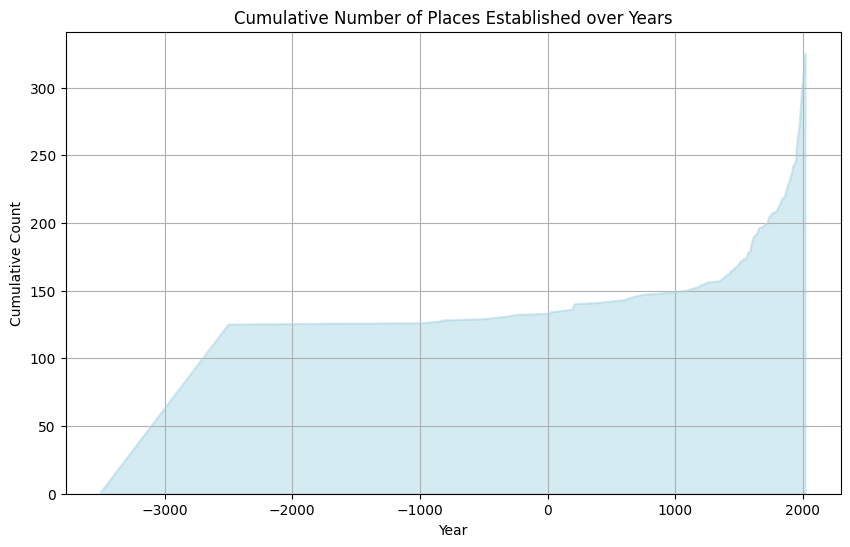

In [10]:
# 7
# Area Chart: An area chart is useful for displaying quantitative data over time, similar to a line chart, but with the area under the line filled, 
#             emphasizing volume or cumulative value.

# For a cumulative graph, you might need a larger dataset
yearly_count = df['Establishment Year Updated'].value_counts().sort_index().cumsum()
yearly_count.plot(kind='area', figsize=(10, 6), color='lightblue', alpha=0.5)
plt.title('Cumulative Number of Places Established over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid()
plt.show()

<Figure size 1800x600 with 0 Axes>

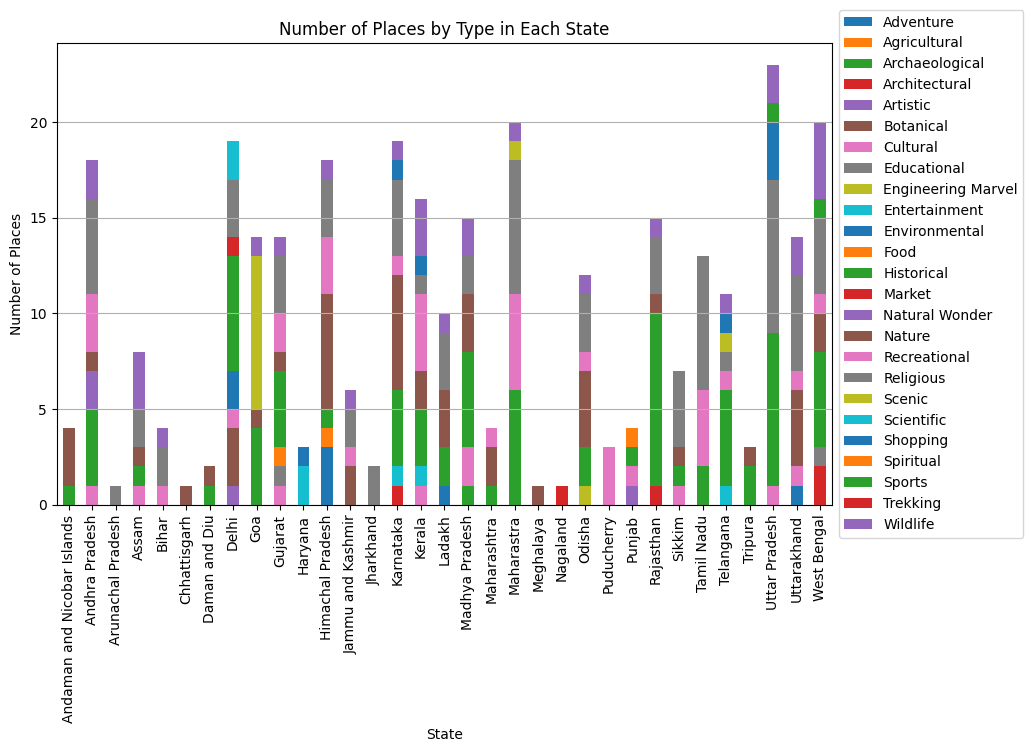

In [11]:
# 8
# Stacked Bar Chart: Utilize a stacked bar chart to compare multiple categories or groups while also showing the total and the composition of each group.

plt.figure(figsize=(18, 6))
state_type_count = df.groupby(['State', 'Significance']).size().unstack().fillna(0)
state_type_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Places by Type in Each State')
plt.xlabel('State')
plt.ylabel('Number of Places')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjusting the legend position
plt.show()

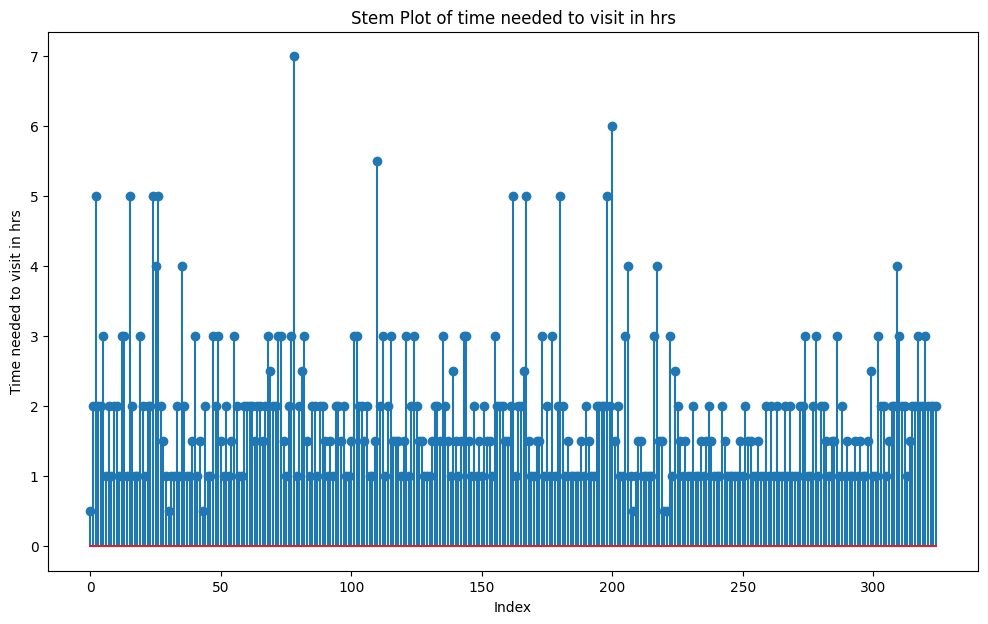

In [12]:
# 9
# Stem Plot: A stem plot displays data points as stems (lines) originating from a baseline, often used 
#            for small datasets to show frequency or distribution.

# Stem Plot for Google review rating
plt.figure(figsize=(12,7))
plt.stem(df.index, df['time needed to visit in hrs'])
plt.title('Stem Plot of time needed to visit in hrs')
plt.xlabel('Index')
plt.ylabel('Time needed to visit in hrs')
plt.show()

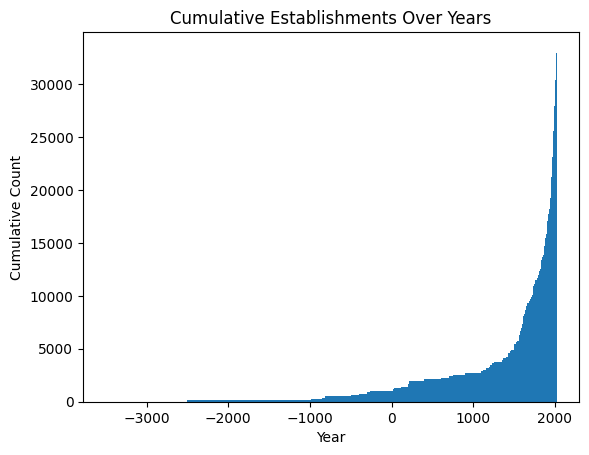

In [13]:
# 10
# Stairs Plot: A stairs plot visualizes stepwise functions or cumulative data by creating a series of 
#              horizontal and vertical lines, resembling a staircase.

# Stairs Plot for Cumulative count of establishments over the years
plt.figure()
years = np.sort(df['Establishment Year Updated'].unique())
# Adding an extra year to 'years' for the final edge
years_with_extra_edge = np.append(years, years[-1] + 1)

counts = np.cumsum([df[df['Establishment Year Updated'] <= year].shape[0] for year in years])
plt.stairs(counts, years_with_extra_edge, fill=True)
plt.title('Cumulative Establishments Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.show()

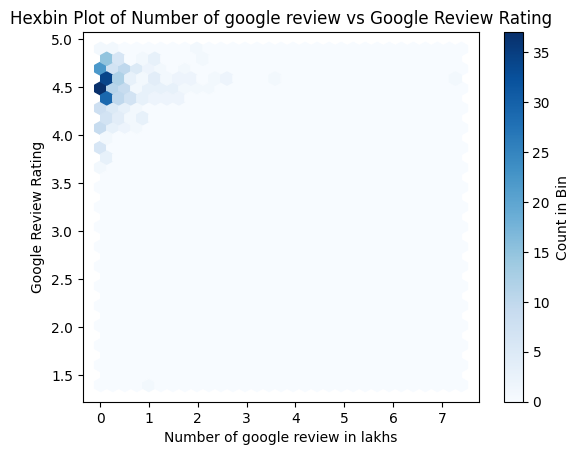

In [14]:
# 11
# Hexbin Plot: A hexbin plot represents the density of bivariate data using a grid of hexagons, where the 
#              color intensity of each hexagon indicates the number of data points within that region.

# Hexbin Plot for Number of google review in lakhs vs Google review rating
plt.figure()
plt.hexbin(df['Number of google review in lakhs'], df['Google review rating'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Number of google review vs Google Review Rating')
plt.xlabel('Number of google review in lakhs')
plt.ylabel('Google Review Rating')
plt.show()